<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
<style>
.body{
    background-color:white;
    }
</style>

<link rel="stylesheet" href="rise.css">

<center>
<img src="img/logoifsc.png" width="20%">

---

# Ciência de Dados
## Modelos Preditivos

### Prof. Carlos Andres Ferrero

### *Beers for Devs - Bate Papo, Tecnologia e Cerveja*

---

</center>

## Vida e Formação

- Natural da Argentina. Residente no Brasil desde 2002, aos 15~16 anos de idade

- **Graduação em Ciência da Computação (2003 - 2006)**
    - Universidade Estadual do Oeste do Paraná (UNIOESTE)
    - Pesquisa: mineração de textos, de imagens e de dados temporais    
    
- **Mestrado em Ciência da Computação e Matemática Computacional (2007-2009)**
    - Instituto de Ciências Matemáticas e de Computação (ICMC), Universidade de São Paulo (USP)    
    - Pesquisa: predição de dados temporais
    
- Professor e pesquisador na UNIOESTE, campus Foz do Iguaçu (2009-2014)

- Professor e pesquisador no IFSC, campus Lages (desde 2014)

- **Doutorando em Ciência da Computação (2015-2020)**
    - Universidade Federal de Santa Catarina (UFSC)
    - Pesquisa: classificação de dados espaço-temporais (trajetórias) 

##  Atividades Atuais

- **Professor e pesquisador** no Instituto Federal de Santa Catarina (IFSC), campus Lages
    - Disciplinas de Mineração de Dados, Tópicos Especiais em IA e algumas de Desenvolvimento Web
- **Grupos de Pesquisa**:
    - Participante - Inteligência Computacional (USP/São Carlos) desde 2007    
    - Participante - Inteligência Computacional e Inserção Tecnológica (UNILA/Foz do Iguaçu) desde 2017
    - Líder - Análise Inteligente de Dados (IFSC/Lages) desde 2014  
- **Projetos em Ciência de Dados**:
    - Master: Multiple ASpects TrajEctoRy Mangement and Analysis (Projeto Europeu H2020)
    - Predição de Risco de Evasão de Alunos (IFSC)
    - Ciência de Dados aplicada à Fiscalização de Tributos (IFSC, SISAMA, RF)
    - Reconhecimento Facial para um Sistema do Presídio Regional de Lages (IFSC, DEAP)    
- **Revisor de Periódicos e Conferências**:
    - *Geographical Information Analytics* (GIA), *Symposium on Applied Computing* (SAC) - Qualis A1    
    - *Knowledge Based Systems Journal* (KBS) - Qualis A1
    - *Future Internet* e *Scientific Annals of Computer Science* - Sem qualis

## Ciência de Dados

- Uma **evolução** da área de **Mineração de Dados**, que conquistou o mercado e a academia.
- Popularização das técnicas de análise de dados, que até então ficavam, em geral, na academia.
- Envolve muitas áreas básicas e aplicadas como:
    - Matemática e Estatística    
    - Visualização de Dados
    - Machine Learning
    - Big Data
    - Linguagens de Programação (Python, R, ...)
    - Domínio de Aplicação (Negócios, Medicina, Biologia, ...)
    - ...

### Processos de Mineração de Dados

<img src="img/kdd_crisp.svg" width="100%" style="margin-top: 50px">

- [Discussão da relação entre KDD e CRISP-DM](http://www.datascience-pm.com/crisp-dm-and-kdd/)

### Processo de Ciência de Dados - Mais recente

<center>
<br>
<img src="https://cdn-images-1.medium.com/max/1500/1*fBNC1lqYSdM6bjMxxr56Tw.png" width="80%">
</center>

## O Que São Modelos?

**Exemplo**

Uma empresa que vende cervejas possui milhares rótulos. Obter opiniões confiáveis de clientes é custoso. A empresa fez um investimento para obter <u>300 avaliações de clientes</u> sobre diferentes cervejas. No sistema de avaliação de produtos os clientes avaliam cada cerveja com as opções: **Compraria** ou **Não Compararia**.

**Objetivo**

A empresa gostaria de saber se dadas as <u>características</u> de uma cerveja, é possível <u>estimar se seria comprada pelos clientes ou não</u>.

**Coleta de Dados**

Das cervejas avaliadas pelos clientes a empresa coletou as <u>características</u>: **Álcool** (teor alcoólico) e **IBUs** (unidades de amargor).

---

Os **modelos** são funções que tentar predizer um objetivo.


**Conjunto de Dados**

O conjunto de dados tem 300 avaliações. Mostramos aqui as primeiras 20.

In [1]:
from sklearn.datasets.samples_generator import make_blobs

n_features = 2
n_samples = 300
n_classes = 2

_X, _y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std = 4, random_state = 1)

import pandas as pd
data = pd.DataFrame({
    'Álcool' : _X[:,0], 
    'IBUs' : _X[:,1], 
    'target' : _y})

from sklearn.preprocessing import MinMaxScaler
data[['Álcool']] = MinMaxScaler(feature_range=(3, 13)).fit_transform(data[['Álcool']])
data[['IBUs']] = MinMaxScaler(feature_range=(0, 20)).fit_transform(data[['IBUs']])
data["target"] = data["target"].astype('category')

data1 = data.copy()
data1['target'] = data1['target'].replace({0: 'Não compraria', 1: 'Compraria'})


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1.round(2).head(20)

,Álcool,IBUs,target
0,5.09,9.77,Compraria
1,7.48,6.64,Compraria
2,7.74,20.00,Não compraria
3,9.51,12.69,Não compraria
4,9.73,13.63,Não compraria
5,10.19,13.69,Não compraria
6,6.33,5.42,Compraria
7,10.71,11.44,Não compraria
8,8.54,15.77,Não compraria
9,5.93,7.84,Compraria


**Visualização de Dados**

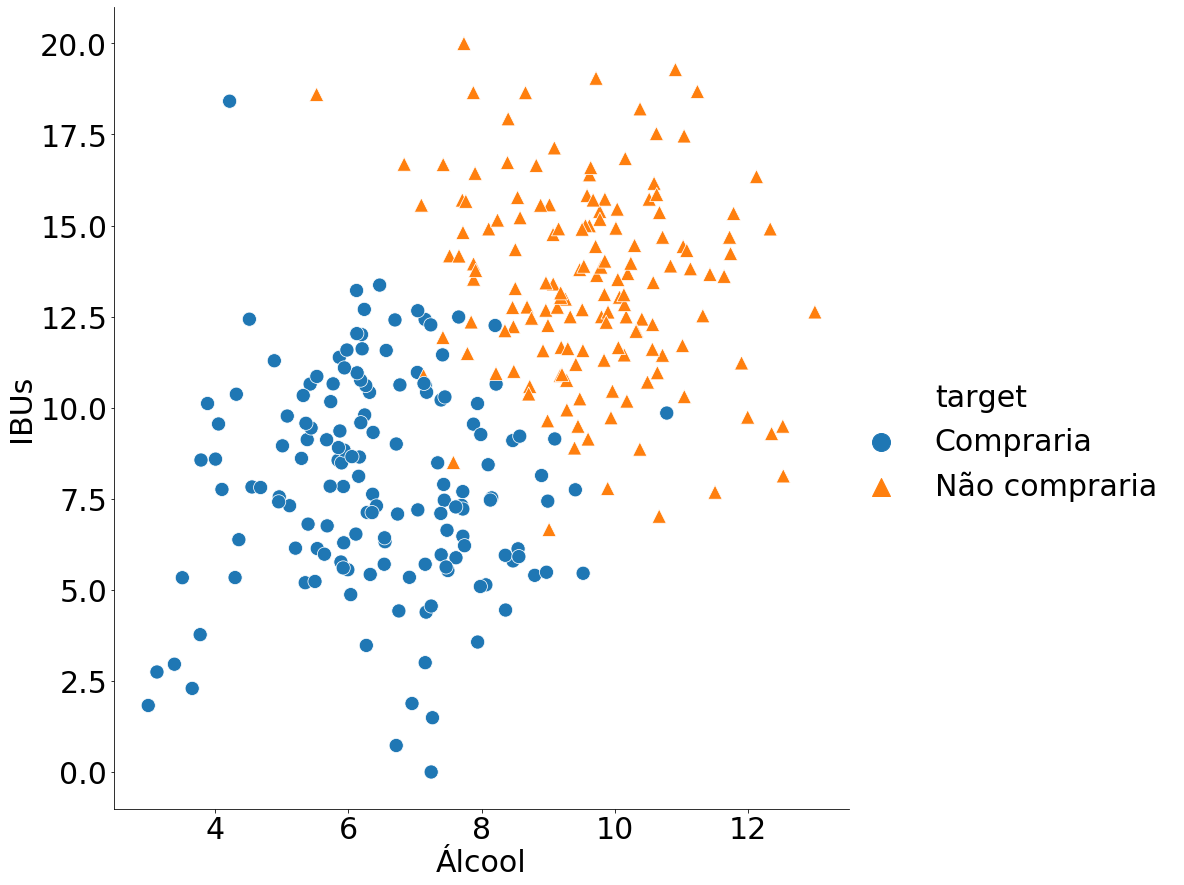

In [3]:
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'legend.markerscale': 3.0})
sns.relplot(x='Álcool', y='IBUs', hue='target', style = "target", markers = ['o','^'], data = data1, height=13, s=200)
plt.show()

**Modelagem**

O **modelo** para predizer se os clientes vão **comprar uma cerveja ou não**:
<br><br><br>
$$ f(x_1, x_2) = w_1 * \text{Álcool} + w_2 * \text{IBUs} + b$$
<br><br>
O valor de $w_1$ é o **peso** do *Álcool* na escolha de compra.

O valor de $w_2$ é o **peso** de *IBUs* na escolha de compra.

O modelo vai assumir que: 
- Os valores **Negativos** se referem a **Compraria**
- Os valores **Positivos** se referem a **Não compraria**


In [4]:
from sklearn.model_selection import train_test_split
target = 'target'
X = data.drop([target], axis=1)
y = data[target].factorize()[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=10)

In [5]:
%%html
<style>
.mytext > * {    
    font-size: 20px;
}

</style>

In [6]:
from ipywidgets import interact, interactive, fixed,interact_manual
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import numpy as np

model = LogisticRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

def logistic_regression_plot(w1,w2,b):    
    model.coef_= np.array([[w1,w2]])
    model.intercept_ = b    
    fig, ax = plt.subplots(figsize=(14, 14))
    plt.rcParams.update({'font.size': 30})
    plt.rcParams.update({'legend.markerscale': 1.0})
    plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=4, ax= ax, markers = ['o','^'], zoom_factor = 3, scatter_kwargs = {'s': 200})
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['compraria','não compraria'], framealpha=0.3, scatterpoints=1, loc='lower right')
    ax.set_xlabel(r'$x_1$ (Álcool)',fontsize=26)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_ylabel(r'$x_2$ (IBUs)',fontsize=26)
    #ax.set_aspect('equal')

plt.rcParams.update({'font.size': 16})
from ipywidgets import Layout, Button, Box
box_layout = Layout(border='solid', )

function_math = widgets.HTMLMath(value=r"<b>Modelo de Classificação</b> $$f(X) = w_1 x_1 + w_2 x_2 + b$$", description='')
w1 = widgets.FloatSlider(min=0.4,max=0.6,step=0.01, description = r'$w_1$', value = 0.5, continuous_update=False )
w2 = widgets.FloatSlider(min=0.0,max=0.4,step=0.01, description = r'$w_2$', value = 0.2, continuous_update=False)
b  = widgets.FloatSlider(min=-8,max=-2,step=0.1, description = 'b', value = -5, continuous_update=False)

w1.add_class("mytext")
w2.add_class("mytext")
b.add_class("mytext")
ui = widgets.HBox([w1, w2, b])
out = widgets.interactive_output(logistic_regression_plot, {'w1': w1, 'w2': w2, 'b': b})

[[0.53232297 0.24685007]]
[-6.74425223]


C:\Users\andres\Anaconda3\envs\dm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Procurando uma Boa Solução**

In [7]:
display(ui, out)

Output()

Um método chamado de Regressão Logística consegue encontrar os melhores valores para essa função:
- $w_1 = 0.53$
- $w_2 = 0.25$
- $b = - 6.70$

Assim, o **modelo final** para predizer se os clientes vão **comprar uma cerveja ou não** é dado por:
<br><br><br>
$$ f(\text{Álcool}, \text{IBUs}) = 0.53 * \text{Álcool} + 0.25 * \text{IBUs} - 6.70 $$
<br><br>
Valores **Negativos** se referem a **Compraria**

Valores **Positivos** se referem a **Não compraria**

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[[0.53232297 0.24685007]]
[-6.74425223]


C:\Users\andres\Anaconda3\envs\dm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Outros Modelos**: *k-Nearest Neighbors*

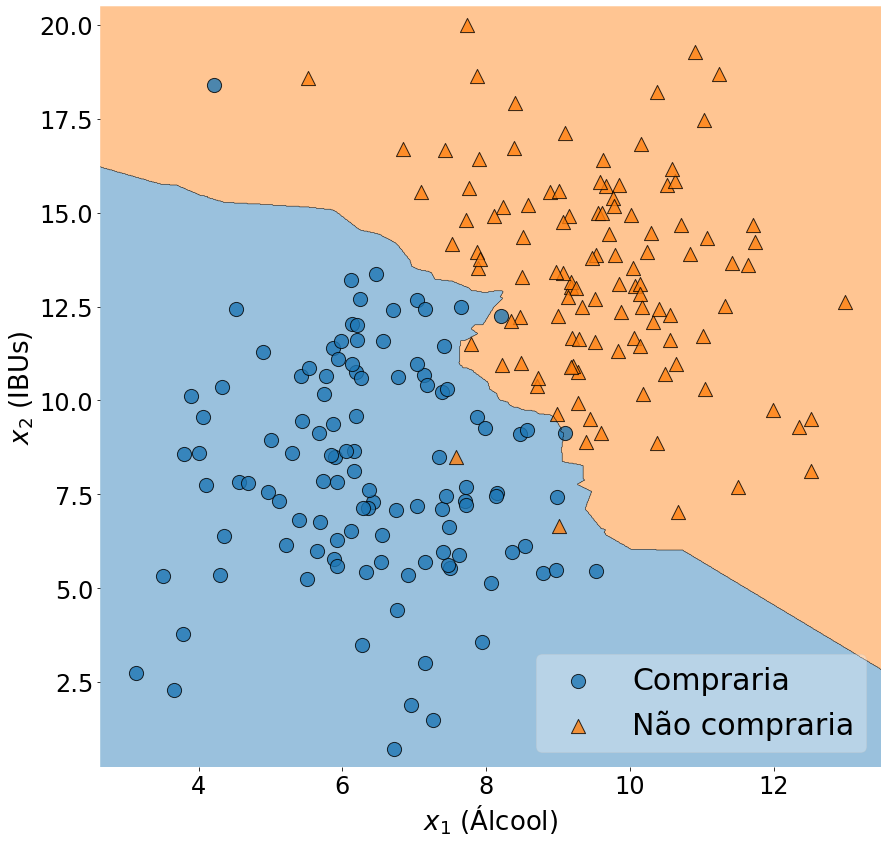

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(14, 14))
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'legend.markerscale': 1.0})
plot_decision_regions(X_train.to_numpy(), y_train, clf=model_knn, legend=1, ax= ax, markers = ['o','^'], zoom_factor = 2, scatter_kwargs = {'s': 200})
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Compraria','Não compraria'], framealpha=0.3, scatterpoints=1, loc='lower right')
ax.set_xlabel(r'$x_1$ (Álcool)',fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_ylabel(r'$x_2$ (IBUs)',fontsize=26)
plt.show()

**Outros Modelos**: *Decision Trees*

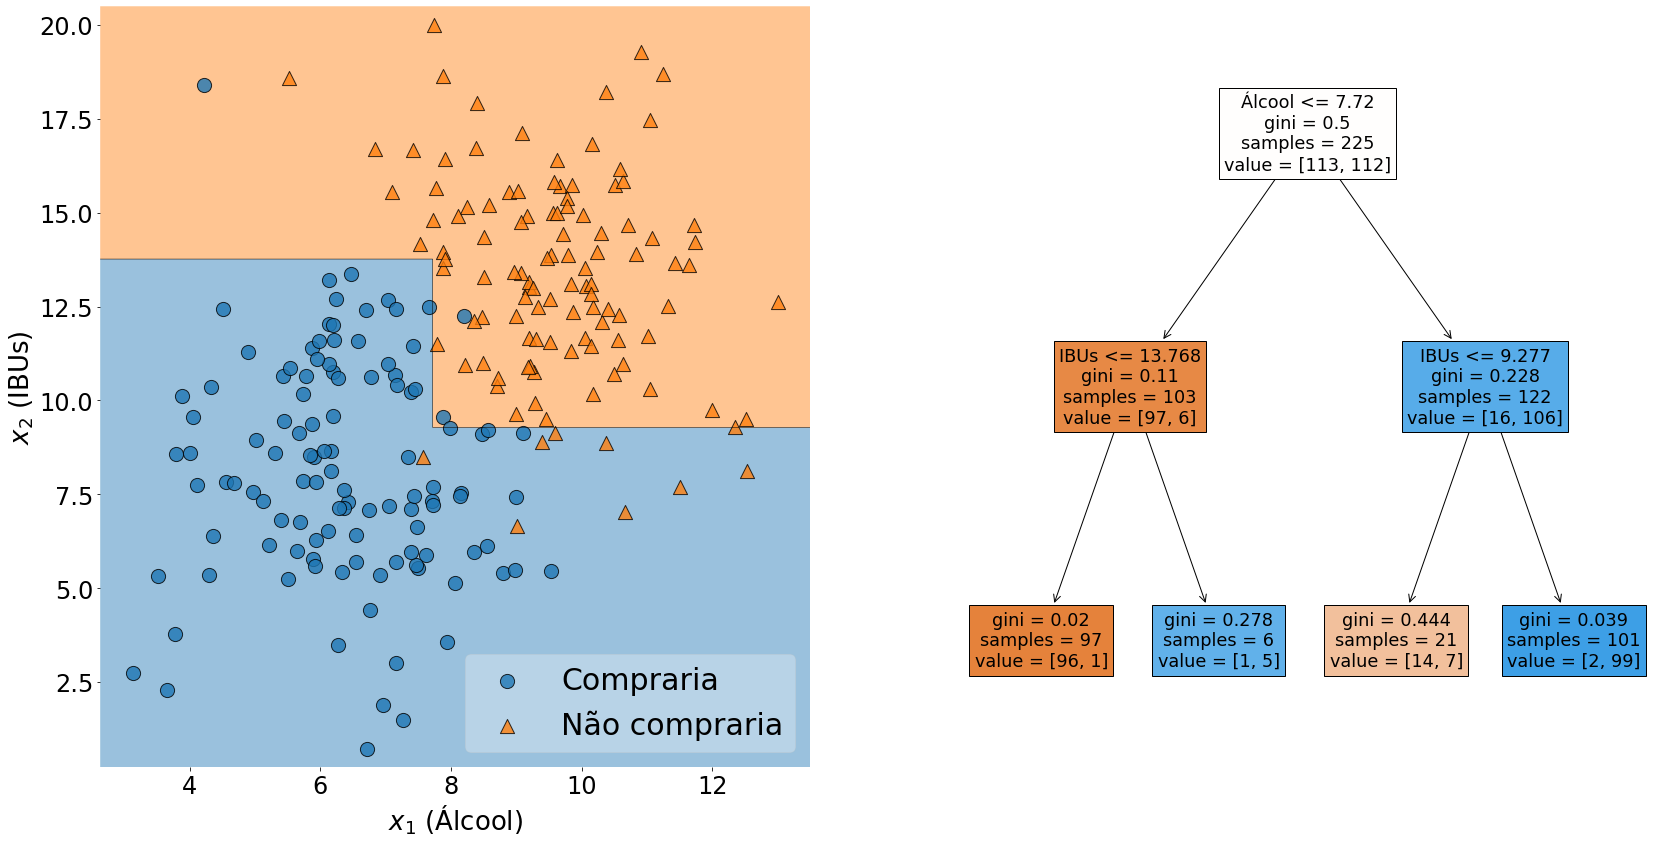

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model_dt = DecisionTreeClassifier(criterion="gini", max_depth=2)
model_dt.fit(X_train,y_train)
fig, ax = plt.subplots(1,2,figsize=(28, 14))
#model_dt1 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
#model_dt1.fit(X_train,y_train)
plot_tree(model_dt, filled=True, feature_names = X.columns, ax=ax[1])
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'legend.markerscale': 1.0})
plot_decision_regions(X_train.to_numpy(), y_train, clf=model_dt, legend=1, ax= ax[0], markers = ['o','^'], zoom_factor = 2, scatter_kwargs = {'s': 200})
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['Compraria','Não compraria'], framealpha=0.3, scatterpoints=1, loc='lower right')
ax[0].set_xlabel(r'$x_1$ (Álcool)',fontsize=26)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].set_ylabel(r'$x_2$ (IBUs)',fontsize=26)
plt.show()

## Análise de Dados Mais Complexos
<br>
<br>


--- 
- **Texto**: *e se cada cliente que avaliou uma cerveja fez um comentário de até 400 caracteres sobre a  mesma? e se fez uma postagem nas redes sociais a respeito?*
---
- **Imagens**: *e se tivéssemos accesso ao rosto do cliente quando ele experimentou a cerveja ou a uma foto na postagem da rede social, qual sentimento poderia ser extraído?*
---
- **Dados Temporais**: *e se soubéssemos o histórico (marca, tipo, ...) de consumo de cervejas desses clientes?*
---
- **Trajetórias**: *e se soubéssemos os locais e horários em que os clientes bebem cerveja, o que poderíamos oferecer? será que eles bebem após trabalhar ou estudar?*

## Caminhos e Oportunidades de Formação em Ciência de Dados

- Cursos Online Free/Pagos    
    - Ciência de Dados e Deep Learning
        - Udacity
        - Coursera
    - Álgebra, Cálculo e Cálculo Numérico (free) - Khan Academy
    
- **No Instituto Federal de Santa Catarina (IFSC/Lages)**
    - Disciplinas:
        - Mineração de Dados
        - Inteligência Artificial
        - Tópicos Especiais em IA
        - Estatística    
    - Matrícula em Disciplina Isolada para Graduados ou Graduandos
    - Portador de Diploma para Graduados (no início de cada semestre)    

## Caminhos e Oportunidades de Formação em Ciência de Dados

- Cursos Online Gratuítos/Pagos
    - Algebra, Cálculo e Cálculo Numérico (free) - Khan Academy https://www.khanacademy.org/
    - Ciência de Dados        - 
        - Udacity
            - Intro to Data Science (free): https://www.udacity.com/course/intro-to-data-science--ud359
            - Data Science: https://www.udacity.com/course/data-scientist-nanodegree--nd025
        - Coursera (free) https://www.coursera.org/specializations/jhu-data-science        
    - Deep Learning
        - Coursera (free): https://www.coursera.org/specializations/deep-learning
        - Udacity: https://www.udacity.com/course/deep-learning-nanodegree--nd101

<link rel="stylesheet" href="ipython.min.css">

<center>
<img src="img/logoifsc.png" width="20%">

---

# Ciência de Dados
## Modelos Preditivos

### Prof. Carlos Andres Ferrero

### *Beers for Devs - Bate Papo, Tecnologia e Cerveja*
---

</center>